# Experiment 1 - Common use case, optimizing N threads

In [6]:
# Import packages
from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%run '/home/mark/Desktop/Plastic-Parallel-Programming/data_analysis/year 2/utilities.ipynb'

Program parameters:

In [7]:
folder_path1    = 'results/focustest2/'
number_of_runs  = 1
number_of_tests = 63

Set files to read

In [8]:
file_names = []

for i in range(1, number_of_tests + 1): 
    file_names.append("test" + str(i) + "/output")

Import the dataset

In [9]:
data = []
        
fetch_data(folder_path1, file_names, data, ["Runtime"])
        
dataset = []

powers_min = 5
powers_max = 11
num_workers_min = 8
num_workers_max = 32
num_workers_step = 8
workloads = ["mulpd", "shared_mem_read_small", "shared_mem_read_large"]
workload = 0

power = powers_min
num_workers = num_workers_min

for i in range(len(data)):
    dataset.append([2 ** power, num_workers, data[i].mean()[0], workloads[workload]])
    
    if num_workers == num_workers_max:
        num_workers_step = 8
        if power == powers_max:
            workload = workload + 1
            num_workers = num_workers_min
            power = powers_min
        else:
            num_workers = num_workers_min
            power = power + 1
    else:
        num_workers = num_workers + num_workers_step
        num_workers_step = num_workers_step + num_workers_step

dataset = pd.DataFrame(dataset)
dataset.columns = ["Grid Size", "Num Workers", "Time", "Workload"]
dataset.loc[dataset["Grid Size"] == some_value]

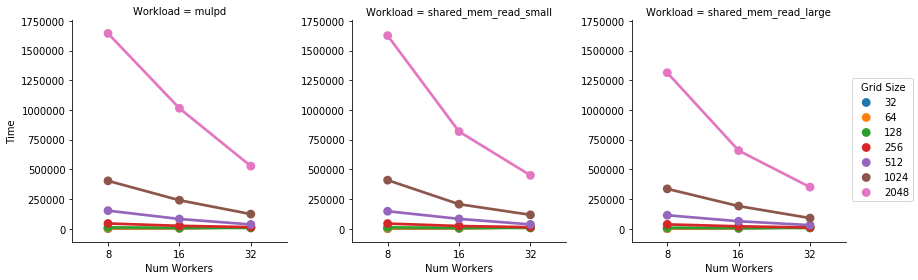

In [11]:
sns.factorplot(x="Num Workers", y="Time",
               col="Workload",
               hue="Grid Size",
               data=dataset);
plt.savefig("graphs/quicktest/focustest21.png")
plt.show()